In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)

In [1]:
import torch

In [3]:
from datasets import load_dataset

imdb = load_dataset("imdb")

Generating test split: 100%|█████| 25000/25000 [00:02<00:00, 8511.42 examples/s]
Generating unsupervised split: 100%|█| 50000/50000 [00:03<00:00, 15576.69 exampl


In [6]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [12]:
tokenizer("hello who let the dogs out", truncation=True)

{'input_ids': [101, 7592, 2040, 2292, 1996, 6077, 2041, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [15]:
len(imdb)

3

In [13]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)
    

In [14]:
tokenized_imdb = imdb.map(preprocess_function, batched=True)

Map: 100%|███████████████████████| 50000/50000 [00:06<00:00, 8271.86 examples/s]


In [18]:
tokenized_imdb['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 25000
})

In [24]:
import evaluate

accuracy = evaluate.load("accuracy")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [25]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [26]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [27]:
!pip install spacy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
DEPRECATION: Loading egg at /Users/aswin/miniconda3/envs/mlenv/lib/python3.11/site-packages/huggingface_hub-0.20.1-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 961.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━

In [30]:
import spacy

nlp = spacy.load('en_core_web_sm')

def extractEntities(doc):
    entities = []

    # Extract entities based on desired patterns or rules
    for token in doc:
        if token.pos_ == 'PROPN':
            entities.append({
                'var_name': token.text.lower().replace(' ', '_'),
                'type': 'string',
                'description': f'{token.text} entity'
            })

    return entities

def generateSQLQuery(entities):
    operation = input("Enter the SQL operation (e.g., SELECT, INSERT, UPDATE, DELETE): ")
    table = input("Enter the table name: ")
    conditions = []

    if operation.upper() == 'SELECT':
        columns = input("Enter the column names (comma-separated): ")
        query = f"SELECT {columns} FROM {table} WHERE "
        for entity in entities:
            var_name = entity['var_name']
            value = input(f"Enter the value for {var_name}: ")
            conditions.append(f"{var_name} = '{value}'")
    elif operation.upper() == 'INSERT':
        columns = input("Enter the column names (comma-separated): ")
        values = input("Enter the values (comma-separated): ")
        query = f"INSERT INTO {table} ({columns}) VALUES ({values})"
    elif operation.upper() == 'UPDATE':
        column = input("Enter the column name to update: ")
        new_value = input("Enter the new value: ")
        query = f"UPDATE {table} SET {column} = '{new_value}' WHERE "
        for entity in entities:
            var_name = entity['var_name']
            value = input(f"Enter the value for {var_name}: ")
            conditions.append(f"{var_name} = '{value}'")
    elif operation.upper() == 'DELETE':
        query = f"DELETE FROM {table} WHERE "
        for entity in entities:
            var_name = entity['var_name']
            value = input(f"Enter the value for {var_name}: ")
            conditions.append(f"{var_name} = '{value}'")
    else:
        print("Invalid SQL operation.")
        return None

    if conditions:
        query += " AND ".join(conditions)

    return query

def convertTextToSQL(text):
    doc = nlp(text)
    entities = extractEntities(doc)
    sqlQuery = generateSQLQuery(entities)

    return sqlQuery

In [31]:
convertTextToSQL("what is the total revenue for last year")

Enter the SQL operation (e.g., SELECT, INSERT, UPDATE, DELETE):  Select
Enter the table name:  revenue
Enter the column names (comma-separated):  sales


'SELECT sales FROM revenue WHERE '

In [33]:
doc = nlp("what is the total revenue for last year")

In [35]:
for token in doc:
    print(token.text, token.pos_)



what PRON
is AUX
the DET
total ADJ
revenue NOUN
for ADP
last ADJ
year NOUN


In [38]:
import nltk
import os

In [39]:
import nltk.corpus

In [40]:
from nltk.tokenize import word_tokenize

In [41]:
from nltk.tokenize import RegexpTokenizer

In [42]:
from nltk.data import load

In [44]:
sent = "Mary had a little lamb"

In [49]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [47]:
sent_tokens = word_tokenize(sent)
sent_tokens

['Mary', 'had', 'a', 'little', 'lamb']

In [52]:
nltk.pos_tag(sent_tokens)

[('Mary', 'NNP'),
 ('had', 'VBD'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('lamb', 'NN')]

In [54]:
hamlet = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')

In [56]:
len(hamlet)

37360

In [57]:
hamlet_pos = []

In [60]:
for word in hamlet[:2000]:
    word_pos = nltk.pos_tag([word])
    hamlet_pos.append(word_pos)
    

In [62]:
hamlet_pos[:10]

[[('[', 'NN')],
 [('The', 'DT')],
 [('Tragedie', 'NN')],
 [('of', 'IN')],
 [('Hamlet', 'NN')],
 [('by', 'IN')],
 [('William', 'NNP')],
 [('Shakespeare', 'NN')],
 [('1599', 'CD')],
 [(']', 'NN')]]

In [63]:
from nltk import ne_chunk
ne_sent = "The US president stays in the whitehouse"
ne_tokens = word_tokenize(ne_sent)

In [64]:
ne_tags = nltk.pos_tag(ne_tokens)

In [65]:
ne_tags

[('The', 'DT'),
 ('US', 'NNP'),
 ('president', 'NN'),
 ('stays', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('whitehouse', 'NN')]

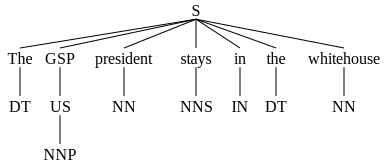

In [68]:
ne_ner = ne_chunk(ne_tags)
ne_ner

In [69]:
from nltk.tokenize import RegexpTokenizer

In [70]:
sent = "The little mouse ate the french cheese"
sent_tokens = nltk.pos_tag(word_tokenize(sent))


In [71]:
sent_tokens

[('The', 'DT'),
 ('little', 'JJ'),
 ('mouse', 'NN'),
 ('ate', 'VB'),
 ('the', 'DT'),
 ('french', 'JJ'),
 ('cheese', 'NN')]

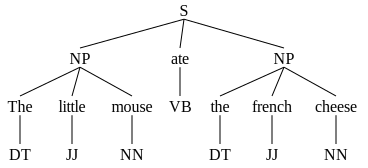

In [74]:
grammar_np = r"NP:{<DT>?<JJ>*<NN>}"
chunk_parser = nltk.RegexpParser(grammar_np)
chunk_result = chunk_parser.parse(sent_tokens)
chunk_result

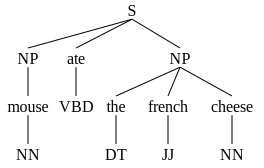

In [75]:
sent = "mouse ate the french cheese"
sent_tokens = nltk.pos_tag(word_tokenize(sent))
grammar_np = r"NP:{<DT>?<JJ>*<NN>}"
chunk_parser = nltk.RegexpParser(grammar_np)
chunk_result = chunk_parser.parse(sent_tokens)
chunk_result

In [78]:
words = "show the list of users"
action_keywords = ['SHOW', 'RETRIEVE', 'GET', 'DISPLAY', 'LIST']
action = next((word for word in words if word.upper() in action_keywords), 'SELECT')

In [79]:
action

'SELECT'

In [80]:
word.isidentifier()

True

In [81]:
word

'then'

In [ ]:
word 